In [1]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [2]:
#importação das planilhas csv para serem dataframes
df2000 = pd.read_csv("dataset_sudeste_relacionados_outliers_2K.csv")

In [3]:
df2000.columns.tolist() #listar colunas de tabela de 2000 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [4]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 2000 linhas
df2000['idade'] = df2000['idade'].fillna(0)
df2000['renda'] = df2000['renda'].fillna(0)
df2000['cidade'] = df2000['cidade'].fillna(0)
df2000['categoria'] = df2000['categoria'].fillna(0)
df2000['nota'] = df2000['nota'].fillna(0)
df2000['feedback'] = df2000['feedback'].fillna(0)

In [5]:
#feedbackisualização de tabela tratada de 2000 linhas
display(df2000.head(2000))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,41,23445.09,Belo Horizonte,B,6.2,Bom
1,2,30,31431.55,Rio de Janeiro,A,9.4,Bom
2,3,78,34981.93,Belo Horizonte,A,6.6,Bom
3,4,52,28385.43,São Paulo,B,5.4,Bom
4,5,19,1748.85,Vitória,B,7.5,Bom
...,...,...,...,...,...,...,...
1995,1996,55,5943.92,Belo Horizonte,A,9.1,Bom
1996,1997,48,3115.57,São Paulo,A,7.0,Bom
1997,1998,20,35574.95,Rio de Janeiro,A,8.8,Bom
1998,1999,35,15450.99,Belo Horizonte,B,6.0,Bom


In [6]:
# Média, mínimo, máximo, quartis, margem de erro, contagem
print("\n### Descrição Estatística 2000###")
print(df2000.describe())


### Descrição Estatística 2000###
                id        idade         renda        nota
count  2000.000000  2000.000000   2000.000000  2000.00000
mean   1000.500000    49.942000  23973.864395     7.43090
std     577.494589    19.491475  13566.053964     1.50202
min       1.000000     1.000000    545.750000     0.70000
25%     500.750000    34.000000  12293.797500     6.20000
50%    1000.500000    50.000000  23837.935000     7.40000
75%    1500.250000    66.000000  35400.425000     8.70000
max    2000.000000   113.000000  91696.750000    10.00000


In [7]:
# Cálculos Estatísticos de idade
media_idade2000 = sum(df2000['idade'])/len(df2000['idade'])
mediana_idade2000 = df2000['idade'].median()
desvio_padrao_idade2000 = df2000['idade'].std()
maximo_idade2000 = df2000['idade'].max()
minimo_idade2000 = df2000['idade'].min()

print('Média de Idade - 2000 Elementos:',round(media_idade2000,0))
print('Mediana de Idade - 2000 Elementos:',round(mediana_idade2000,0))
print('Desvio Padrão de Idade - 2000 Elementos:',round(desvio_padrao_idade2000,0))
print('Maior Valor de Idade - 2000 Elementos:',round(maximo_idade2000,0))
print('Menor Valor de Idade - 2000 Elementos:',round(minimo_idade2000,0))

Média de Idade - 2000 Elementos: 50.0
Mediana de Idade - 2000 Elementos: 50.0
Desvio Padrão de Idade - 2000 Elementos: 19.0
Maior Valor de Idade - 2000 Elementos: 113
Menor Valor de Idade - 2000 Elementos: 1


In [8]:
# Cálculos Estatísticos de renda
media_renda2000 = sum(df2000['renda'])/len(df2000['renda'])
mediana_renda2000 = df2000['renda'].median()
desvio_padrao_renda2000 = df2000['renda'].std()
maximo_renda2000 = df2000['renda'].max()
minimo_renda2000 = df2000['renda'].min()

print('Média de Renda - 2000 Elementos:',round(media_renda2000,2))
print('Mediana de Renda - 2000 Elementos:',round(mediana_renda2000,2))
print('Desvio Padrão de Renda - 2000 Elementos:',round(desvio_padrao_renda2000,2))
print('Maior Valor de Renda - 2000 Elementos:',round(maximo_renda2000,2))
print('Menor Valor de Renda - 2000 Elementos:',round(minimo_renda2000,2))

Média de Renda - 2000 Elementos: 23973.86
Mediana de Renda - 2000 Elementos: 23837.94
Desvio Padrão de Renda - 2000 Elementos: 13566.05
Maior Valor de Renda - 2000 Elementos: 91696.75
Menor Valor de Renda - 2000 Elementos: 545.75


In [9]:
# Cálculos Estatísticos de nota
media_nota2000 = sum(df2000['nota'])/len(df2000['nota'])
mediana_nota2000 = df2000['nota'].median()
desvio_padrao_nota2000 = df2000['nota'].std()
maximo_nota2000 = df2000['nota'].max()
minimo_nota2000 = df2000['nota'].min()

print('Média de Nota - 2000 Elementos:',round(media_nota2000,2))
print('Mediana de Nota - 2000 Elementos:',round(mediana_nota2000,2))
print('Desvio Padrão de Nota - 2000 Elementos:',round(desvio_padrao_nota2000,2))
print('Maior Valor de Nota - 2000 Elementos:',round(maximo_nota2000,2))
print('Menor Valor de Nota - 2000 Elementos:',round(minimo_nota2000,2))

Média de Nota - 2000 Elementos: 7.43
Mediana de Nota - 2000 Elementos: 7.4
Desvio Padrão de Nota - 2000 Elementos: 1.5
Maior Valor de Nota - 2000 Elementos: 10.0
Menor Valor de Nota - 2000 Elementos: 0.7


In [10]:
#Calculando o IQR e identificando os limites - Renda
Q1_renda2000 = df2000['renda'].quantile(0.25)
Q3_renda2000 = df2000['renda'].quantile(0.75)
IQR_renda2000 = Q3_renda2000 - Q1_renda2000
limite_inferior_renda2000 = Q1_renda2000 - 1.5 * IQR_renda2000
limite_superior_renda2000 = Q3_renda2000 + 1.5 * IQR_renda2000

print (f"\n\n\t IQR - Campo Renda - 2000\n\n")
print(f"Quartis -> Q1: {Q1_renda2000:-8.2f}  ->  Q3: {Q3_renda2000:-8.2f}")
print(f"IQR ----- {IQR_renda2000}")
print(f"Limites - Inf: {limite_inferior_renda2000:-8.2f}  -> Sup: {limite_superior_renda2000:-8.2f}")



	 IQR - Campo Renda - 2000


Quartis -> Q1: 12293.80  ->  Q3: 35400.43
IQR ----- 23106.627500000002
Limites - Inf: -22366.14  -> Sup: 70060.37


In [11]:
#Calculando o IQR e identificando os limites - Idade
Q1_idade2000 = df2000['idade'].quantile(0.25)
Q3_idade2000 = df2000['idade'].quantile(0.75)
IQR_idade2000 = Q3_idade2000 - Q1_idade2000
limite_inferior_idade2000 = Q1_idade2000 - 1.5 * IQR_idade2000
limite_superior_idade2000 = Q3_idade2000 + 1.5 * IQR_idade2000

print (f"\n\n\t IQR - Campo Idade - 2000\n\n")
print(f"Quartis -> Q1: {Q1_idade2000:-8.2f}  ->  Q3: {Q3_idade2000:-8.2f}")
print(f"IQR ----- {IQR_idade2000}")
print(f"Limites - Inf: {limite_inferior_idade2000:-8.2f}  -> Sup: {limite_superior_idade2000:-8.2f}")



	 IQR - Campo Idade - 2000


Quartis -> Q1:    34.00  ->  Q3:    66.00
IQR ----- 32.0
Limites - Inf:   -14.00  -> Sup:   114.00


In [12]:
#Calculando o IQR e identificando os limites - Nota
Q1_nota2000 = df2000['nota'].quantile(0.25)
Q3_nota2000 = df2000['nota'].quantile(0.75)
IQR_nota2000 = Q3_nota2000 - Q1_nota2000
limite_inferior_nota2000 = Q1_nota2000 - 1.5 * IQR_nota2000
limite_superior_nota2000 = Q3_nota2000 + 1.5 * IQR_nota2000

print (f"\n\n\t IQR - Campo Nota - 2000\n\n")
print(f"Quartis -> Q1: {Q1_nota2000:-8.2f}  ->  Q3: {Q3_nota2000:-8.2f}")
print(f"IQR ----- {IQR_nota2000}")
print(f"Limites - Inf: {limite_inferior_nota2000:-8.2f}  -> Sup: {limite_superior_nota2000:-8.2f}")



	 IQR - Campo Nota - 2000


Quartis -> Q1:     6.20  ->  Q3:     8.70
IQR ----- 2.499999999999999
Limites - Inf:     2.45  -> Sup:    12.45


In [13]:
#Outliers Renda
outliers_renda2000 = df2000[(df2000['renda'] < limite_inferior_renda2000) | (df2000['renda'] > limite_superior_renda2000)]
print(f"\n### Possíveis Outliers em 'renda' - 2000 Elementos###\n\n{outliers_renda2000}\n\n\n")


### Possíveis Outliers em 'renda' - 2000 Elementos###

        id  idade     renda          cidade categoria  nota feedback
83      84     91  89175.69  Belo Horizonte         B   2.4      Bom
375    376      7  77505.90  Rio de Janeiro         B   4.9      Bom
826    827     86  72759.46       São Paulo         B   3.8      Bom
829    830     94  91696.75  Rio de Janeiro         A   1.2      Bom
1768  1769     92  81470.13         Vitória         B   4.6      Bom
1802  1803      4  78551.12  Rio de Janeiro         B   2.9      Bom





In [14]:
#Outliers Idade
outliers_idade2000 = df2000[(df2000['idade'] < limite_inferior_idade2000) | (df2000['idade'] > limite_superior_idade2000)]
print(f"\n### Possíveis Outliers em 'idade' - 2000 Elementos###\n\n{outliers_idade2000}\n\n\n")


### Possíveis Outliers em 'idade' - 2000 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [15]:
#Outliers Nota
outliers_nota2000 = df2000[(df2000['nota'] < limite_inferior_nota2000) | (df2000['nota'] > limite_superior_nota2000)]
print(f"\n### Possíveis Outliers em 'nota' - 2000 Elementos###\n\n{outliers_nota2000}\n\n\n")


### Possíveis Outliers em 'nota' - 2000 Elementos###

        id  idade     renda          cidade categoria  nota feedback
7        8      3   1096.26         Vitória         A   0.7      Bom
83      84     91  89175.69  Belo Horizonte         B   2.4      Bom
95      96     93   1291.11         Vitória         A   1.2      Bom
179    180      8    870.31         Vitória         B   1.7      Bom
829    830     94  91696.75  Rio de Janeiro         A   1.2      Bom
1035  1036      1   1342.88       São Paulo         B   2.1      Bom
1420  1421     10  54045.39  Belo Horizonte         B   1.9      Bom
1991  1992     88  50842.11  Rio de Janeiro         A   2.2      Bom





In [16]:
#Conversão da planilha tratada para csv
df2000.to_csv('Relacionado2000_Tratado.csv', index=False)

In [17]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo2000 = df2000.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Relacionado2000.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo2000, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 2000 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 2000 linhas!


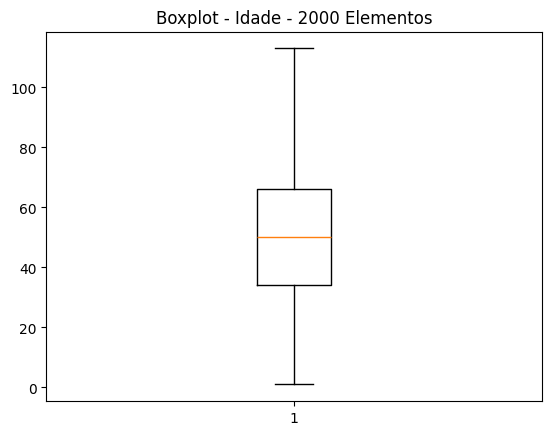

In [18]:
#Geração Gráfico - Idade - 2000 linhas
plt.boxplot(df2000['idade'])
plt.title("Boxplot - Idade - 2000 Elementos")
plt.show()

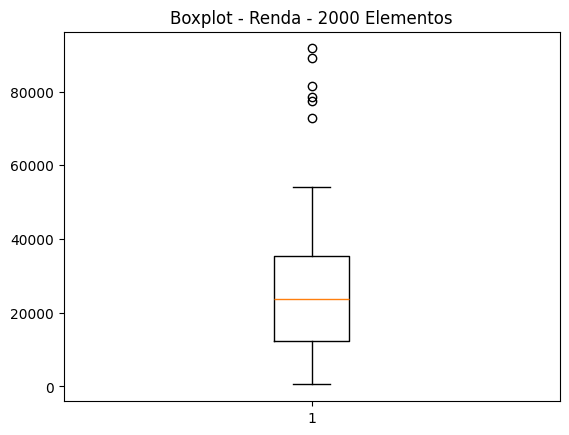

In [19]:
#Geração Gráfico - Renda - 2000 linhas
plt.boxplot(df2000['renda'])
plt.title("Boxplot - Renda - 2000 Elementos")
plt.show()

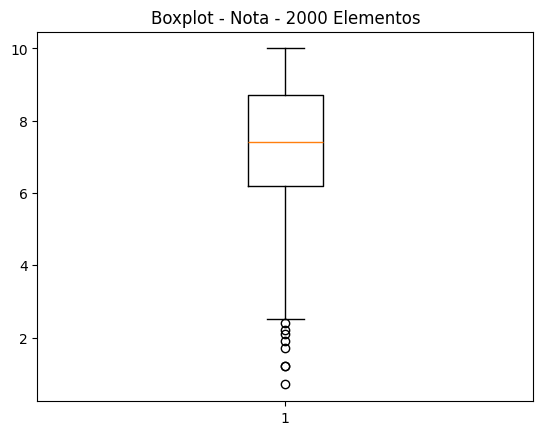

In [20]:
#Geração Gráfico - Nota - 2000 linhas
plt.boxplot(df2000['nota'])
plt.title("Boxplot - Nota - 2000 Elementos")
plt.show()